<a href="https://colab.research.google.com/github/belogabriel/pandas_lib/blob/main/MINIPROJ_IMOVEIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MINIPROJETO SLOT 3 - ROOF IMÓVEIS**



### AUTOR:
   **GABRIEL BELO**
    

projeto incompleto

# RELATÓRIO
### PROJETO ROOF MÓVEIS

#### Primeiro foi realizado um estudo sobre como mensurar valores de imoveis e quais pontos devem ser priorizados nesse cálculo, logo após foi dado uma olhada sobre as cidades mais valorizadas no condado de King County.

#### Feito isso, foi realizada a importação do dataframe, logo após analizá-lo foram realizadas limpezas, como arredondamentos de dados inteiros que se encontravam em float e transformação do type das datas para datetime de forma que se tornasse mais facil a manipulação.

#### Logo depois foram feitas algumas manipulações para que pudesse visualizar grupos específicos dentro dos dados, filtrando de formas a realizar insights significativos. Alguns gráficos foram plotados para melhor visualização.



## 1. IMPORT LIBS


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. DATASET

In [ ]:
house_data = pd.read_csv('/content/kc_house_data.csv', sep=',', decimal='.')
print(house_data.shape)
house_data.head(3)

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


## 3. TRATAMENTO DOS DADOS

In [ ]:
house_data['date']= pd.to_datetime(house_data['date'])
house_data['bathrooms'] = house_data['bathrooms'].astype(np.int64)
house_data.drop_duplicates(subset=['id'], keep='last').reset_index(drop=True)
house_data.info()
house_data.sample(5)

# NENHUM OUTRO TRATAMENTO FOI APLICADO POIS O DATASET NÃO POSSUI VALORES NULL

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  int64         
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5117,9412400185,2014-06-19,1309500.0,4,4,4750,13912,2.0,0,2,...,10,3600,1150,2005,0,98118,47.5332,-122.265,3600,22124
13469,871001085,2015-01-29,652000.0,3,1,1470,6122,1.0,0,0,...,8,1200,270,1948,0,98199,47.6517,-122.406,2200,6122
4721,1517900100,2014-10-21,499000.0,4,2,2680,10590,2.0,0,0,...,8,2680,0,2004,0,98019,47.7377,-121.970,2330,5566
9821,3598600049,2015-04-24,224000.0,1,0,840,7203,1.5,0,0,...,6,840,0,1949,0,98168,47.4756,-122.301,1560,8603
7144,5416500980,2014-07-29,419900.0,4,2,2750,5767,2.0,0,0,...,9,2750,0,2005,0,98038,47.3595,-122.038,2800,5376


## 4. INICIO DO PROJ

In [ ]:
# 5 imoveis mais caros
house_data.sort_values(['price'], ascending=False).head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000.0,6,8,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,2014-06-11,7062500.0,5,4,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,2014-09-19,6885000.0,6,7,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,2014-08-04,5570000.0,5,5,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,2015-04-13,5350000.0,5,5,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [ ]:
# 5 imoveis mais baratos
house_data.sort_values(['price'], ascending=True).head(5)
# print(house_data.groupby(['price']).mean())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,2015-02-17,75000.0,1,0,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,2014-05-06,78000.0,2,1,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,2014-05-23,80000.0,1,0,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,2015-03-24,81000.0,2,1,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,2014-11-05,82000.0,3,1,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250


In [ ]:
# preço do metro² do imovel mais caro e dos 15 imoveis mais próximos

m2_me = 7700000.0/8800 # preço total do imóvel/tamanho do lote
price_15 = (house_data['price'].head(15).mean().round())/8800 # media dos 15 imoveis mais caros/media da area construída
print('$', price_15.round(), '(PREÇO DO M² DOS 15 IMÓVEIS MAIS PRÓXIMOS)') # preço do m² dos 15 imoveis mais próx.
print('$', m2_me, '(PREÇO DO M² DO IMÓVEL MAIS CARO PRESENTE NO DS)') # preço do m² do imóvel mais caro.

$ 51.0 (PREÇO DO M² DOS 15 IMÓVEIS MAIS PRÓXIMOS)
$ 875.0 (PREÇO DO M² DO IMÓVEL MAIS CARO PRESENTE NO DS)


In [ ]:
grade_filter = house_data.groupby(['grade'])['sqft_living','price'].agg(
  ['min','max','mean']).head(10) # agrupar por nota, exibindo valores de area habitavel e preço dos imóveis
grade_filter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


sqft_living                         price                         
              min    max         mean       min        max          mean
grade                                                                   
1             290    290   290.000000  142000.0   142000.0  1.420000e+05
3             520    670   596.666667   75000.0   280000.0  2.056667e+05
4             384   1470   660.482759   80000.0   435000.0  2.143810e+05
5             370   2040   983.326446   78000.0   795000.0  2.485240e+05
6             390   3900  1191.561335   82000.0  1200000.0  3.019196e+05
7             550   4480  1689.400401   90000.0  2050000.0  4.025903e+05
8             750   5370  2184.748517  140000.0  3070000.0  5.428528e+05
9             860   6900  2868.139962  230000.0  2700000.0  7.735132e+05
10           1180   6630  3520.299824  316000.0  3600000.0  1.071771e+06
11           2370  10040  4395.448622  420000.0  7062500.0  1.496842e+06

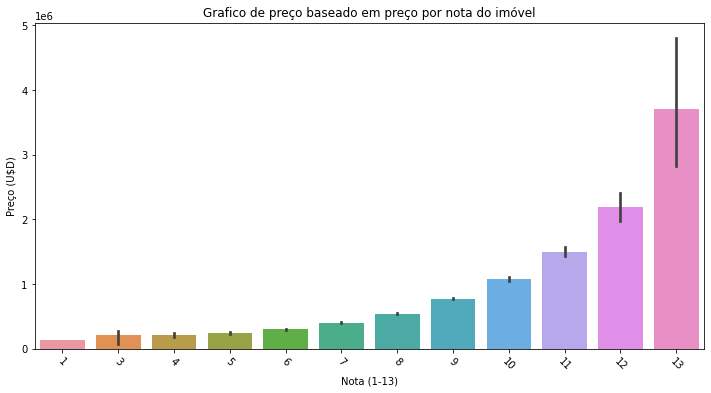

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=house_data, x='grade',y='price')
plt.xticks(rotation=-45)
plt.title('Grafico de preço baseado em preço por nota do imóvel')
plt.ylabel('Preço (U$D)')
plt.xlabel('Nota (1-13)')
plt.show()

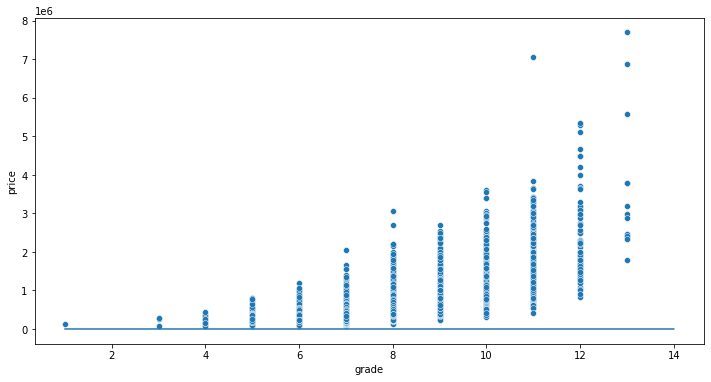

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=house_data, x = house_data['grade'], y=house_data['price'])
sns.lineplot(x = [1,14], y = [0,10])

In [ ]:
house_data[house_data['grade'] == 13].sort_values(by='price', ascending=False)
# VISUALIZAÇÃO DOS IMÓVEIS COM MAIOR NOTA, SENDO EXIBIDOS DO MAIOR PARA O MENOR PREÇO.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000.0,6,8,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
9254,9208900037,2014-09-19,6885000.0,6,7,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,2014-08-04,5570000.0,5,5,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
7035,853200010,2014-07-01,3800000.0,5,5,7050,42840,1.0,0,2,...,13,4320,2730,1978,0,98004,47.6229,-122.220,5070,20570
19017,2303900100,2014-09-11,3800000.0,3,4,5510,35000,2.0,0,4,...,13,4910,600,1997,0,98177,47.7296,-122.370,3430,45302
7907,1068000375,2014-09-23,3200000.0,6,5,7100,18200,2.5,0,0,...,13,5240,1860,1933,2002,98199,47.6427,-122.408,3130,6477
10373,3303850390,2014-12-12,2983000.0,5,5,7400,18898,2.0,0,3,...,13,6290,1110,2001,0,98006,47.5431,-122.112,6110,26442
14556,2303900035,2014-06-11,2888000.0,5,6,8670,64033,2.0,0,4,...,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021
4811,9831200500,2015-03-04,2479000.0,5,3,6810,7500,2.5,0,0,...,13,6110,700,1922,0,98102,47.6285,-122.322,2660,7500
13411,2426039123,2015-01-30,2415000.0,5,4,7880,24250,2.0,0,2,...,13,7880,0,1996,0,98177,47.7334,-122.362,2740,10761


In [ ]:
grade13mean = house_data[house_data['grade'] == 13].sort_values(by='price').mean().round()
grade13mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


id               4.125712e+09
price            3.709615e+06
bedrooms         5.000000e+00
bathrooms        5.000000e+00
sqft_living      7.483000e+03
sqft_lot         2.820500e+04
floors           2.000000e+00
waterfront       0.000000e+00
view             2.000000e+00
condition        3.000000e+00
grade            1.300000e+01
sqft_above       6.061000e+03
sqft_basement    1.422000e+03
yr_built         1.977000e+03
yr_renovated     4.610000e+02
zipcode          9.808600e+04
lat              4.800000e+01
long            -1.220000e+02
sqft_living15    4.005000e+03
sqft_lot15       2.552900e+04
dtype: float64

In [ ]:
!pip install uszipcode
from uszipcode import SearchEngine



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 120 kB 9.5 MB/s 
     |████████████████████████████████| 76 kB 5.2 MB/s 
     |████████████████████████████████| 45 kB 2.6 MB/s 
     |████████████████████████████████| 41 kB 393 kB/s 


/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
house_data['City'] = np.nan #criando nova coluna para as cidades

In [ ]:
eng = SearchEngine() #transformando o zipcode em cidade
for i, r in house_data.iterrows():
  zipcode = eng.by_zipcode(house_data['zipcode'][i])
  house_data['City'][i] = zipcode.major_city




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish
